# Clustering

In [104]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn import metrics
import csv
import os
from sklearn.metrics import confusion_matrix

selectedFeatures = ['wavelet-HH_glcm_ClusterShade_T2_T2M', 'wavelet-HL_glszm_ZoneEntropy_T2_T2M', 'log-sigma-3-mm-3D_ngtdm_Strength_T2_T2M', 'log-sigma-5-mm-3D_gldm_LowGrayLevelEmphasis_T2_T2M', 'square_firstorder_RobustMeanAbsoluteDeviation_T2_T2M', 'lbp-2D_firstorder_Median_T2_T2M', 'lbp-2D_glcm_Autocorrelation_T2_T2M', 'squareroot_firstorder_Kurtosis_T2_T2M', 'log-sigma-1-mm-3D_glcm_ClusterShade_T2_T2M', 'lbp-2D_ngtdm_Busyness_T2_T2M', 'log-sigma-1-mm-3D_glszm_LargeAreaHighGrayLevelEmphasis_T2_T2M', 'wavelet-LH_glcm_Autocorrelation_T2_T2M', 'lbp-2D_firstorder_InterquartileRange_T2_T2M', 'square_glszm_ZoneEntropy_T2_T2M', 'logarithm_firstorder_10Percentile_T2_T2M', 'wavelet-HH_glcm_Imc1_T2_T2M', 'lbp-2D_glcm_ClusterTendency_T2_T2M', 'logarithm_firstorder_InterquartileRange_T2_T2M', 'square_glcm_Imc1_T2_T2M', 'lbp-2D_glcm_ClusterProminence_T2_T2M']
selectionFeaturesPath = "/media/sambit/HDD/Sambit/Projects/Radiomics_Project1/Code/Radiomics/feature_extraction/selection_features.csv"
manualFeaturesPath = "/media/sambit/HDD/Sambit/Projects/Radiomics_Project1/Data/manual_features/manual_features_new.csv"
testIds = ["Pat1"]

# Read input data from csv-files
X = pd.read_csv(selectionFeaturesPath, index_col="patientId", delimiter=';') # All data in selectionFeatures.csv
X = X[selectedFeatures] # Filter on the selected features
idX = X.index.values # Patients with input data

# Read output data from csv-files
y = pd.read_csv(manualFeaturesPath, index_col="id") # All data in manualFeatures.csv
y = y.drop(columns=['Unnamed: 0'])
y = y[y['outcome'] >= 0] # Keep only patients with given outcome
y = y[['outcome']] # Keep only outcome
idY = y.index.values # Patients with output data

# Select patiets that have both input and output
patIds = np.array([id for id in idX if id in idY])
X = X.loc[patIds]
y = y.loc[patIds]

trainIds = [v for v in X.index.values if v not in testIds]

yTest = y.loc[testIds]
Xtest = X.loc[testIds]
yTrain = y.loc[trainIds]
Xtrain = X.loc[trainIds]

In [106]:
Xtrain.shape, yTrain.shape

((101, 20), (101, 1))

In [107]:
Xtrain.head()

,wavelet-HH_glcm_ClusterShade_T2_T2M,wavelet-HL_glszm_ZoneEntropy_T2_T2M,log-sigma-3-mm-3D_ngtdm_Strength_T2_T2M,log-sigma-5-mm-3D_gldm_LowGrayLevelEmphasis_T2_T2M,square_firstorder_RobustMeanAbsoluteDeviation_T2_T2M,lbp-2D_firstorder_Median_T2_T2M,lbp-2D_glcm_Autocorrelation_T2_T2M,squareroot_firstorder_Kurtosis_T2_T2M,log-sigma-1-mm-3D_glcm_ClusterShade_T2_T2M,lbp-2D_ngtdm_Busyness_T2_T2M,log-sigma-1-mm-3D_glszm_LargeAreaHighGrayLevelEmphasis_T2_T2M,wavelet-LH_glcm_Autocorrelation_T2_T2M,lbp-2D_firstorder_InterquartileRange_T2_T2M,square_glszm_ZoneEntropy_T2_T2M,logarithm_firstorder_10Percentile_T2_T2M,wavelet-HH_glcm_Imc1_T2_T2M,lbp-2D_glcm_ClusterTendency_T2_T2M,logarithm_firstorder_InterquartileRange_T2_T2M,square_glcm_Imc1_T2_T2M,lbp-2D_glcm_ClusterProminence_T2_T2M
patientId,,,,,,,,,,,,,,,,,,,,
Pat10,0.010647,5.439460,0.056275,0.013883,1.703124,4.0,2.178931,10.586305,9.051965,19573.979969,29589.941876,42.550339,4.0,5.594674,-150.302998,-0.012213,0.513214,25.021852,-0.186296,0.513618
Pat101,-0.044246,5.612858,0.175451,0.003847,3.256804,5.0,2.305912,20.678185,72.504864,14160.145625,3914.017600,72.456033,4.0,5.424813,-258.414410,-0.029991,0.468864,22.549553,-0.107667,0.468655
Pat102,0.242993,5.993273,0.340777,0.006925,2.022610,5.0,2.292070,51.958662,182.892283,12737.455077,27214.331259,110.782643,4.0,5.663621,-272.179288,-0.037575,0.479699,17.473458,-0.163119,0.479397
Pat103,-0.010339,5.730115,0.157972,0.010796,1.094583,5.0,2.347491,2.996324,132.852422,7127.175159,4101.752492,57.014896,4.0,5.142703,-237.569318,-0.037020,0.471074,149.817866,-0.125029,0.470575
Pat107,-0.016588,5.924921,0.771996,0.020325,1.553913,5.0,2.360302,1.742027,-47.214570,1970.551941,1853.139684,58.060272,3.0,4.834541,-193.087336,-0.040935,0.461973,349.404532,-0.186696,0.460854


In [121]:
yTrain

,outcome
id,
Pat10,1
Pat101,1
Pat102,0
Pat103,1
Pat107,1
Pat108,1
Pat109,1
Pat11,0
Pat110,1


In [120]:
from sklearn.cluster import KMeans

clustering = KMeans(n_clusters=2, random_state=1)
clustering.fit(Xtrain)
clustering.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

Text(0.5, 1.0, 'GT Classification')

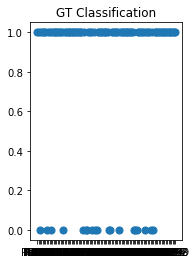

In [112]:
import matplotlib.pyplot as plt

color_theme = np.array(['darkgray', 'lightsalmon', 'powderblue'])
plt.subplot(1, 2, 1)
plt.scatter(x = Xtrain.index, y = yTrain.outcome, s=50)
plt.title('GT Classification')

In [138]:
import os 
path = "/media/sambit/HDD/Sambit/Projects/Radiomics_Project1/Data/Data_DICOM"

T2_DWI = 0
for i in sorted(os.listdir(path)):
    if i.split('_')[0] in X.index:
        path_temp = os.path.join(path, i)
        for j in sorted(os.listdir(path_temp)):
            if j.split('_')[-1] == 'b800':
                T2_DWI += 1
#         if os.path.exists(os.path.join(path_temp, i.split('_')[0] + "_b800")) and os.path.exists(os.path.join(path_temp, i.split('_')[0] + "_T2")):
            
T2_DWI
    

96

(50, 384, 384) (50, 384, 384)


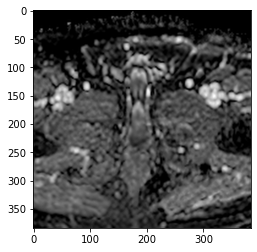

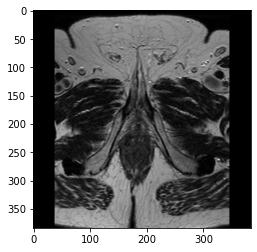

In [143]:
from utils import convert_DWI_to_T2
import matplotlib.pyplot as plt

path_DWI = "/media/sambit/HDD/Sambit/Projects/Radiomics_Project1/Data/Data_DICOM/Pat18_DICOM/Pat18_ADC/4VDPWVZY/Z0XIUZIZ"
path_T2 = "/media/sambit/HDD/Sambit/Projects/Radiomics_Project1/Data/Data_DICOM/Pat18_DICOM/Pat18_T2/4VDPWVZY/0FXMYJIZ"

DWI, T2 = convert_DWI_to_T2(path_DWI, path_T2)
print(DWI.shape, T2.shape)
plt.imshow(DWI[9,:,:], cmap="gray")
plt.show()
plt.imshow(T2[9,:,:], cmap="gray")
plt.show()

In [152]:
import nrrd

path = "/media/sambit/HDD/Sambit/Projects/Radiomics_Project1/Data/data.nrrd"
nrrd.write(path, DWI)
path = "/media/sambit/HDD/Sambit/Projects/Radiomics_Project1/Data/data.nrrd"
nrrd.write(path, DWI)